# Stock Price Prediction Using Deep Learning  
_A Comparative Study of CNN and SimpleRNN Models_


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



In [13]:
meta_df = pd.read_csv('symbols_valid_meta.csv')
print("Total Tickers:", len(meta_df))

# Show first few rows to confirm csv loads
meta_df.head()


Total Tickers: 8049


,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N


## Data Preprocessing

We load historical stock price data, normalize the values using MinMaxScaler, and create lagged sequences suitable for time-series forecasting.


In [17]:
# Filter Stocks
filtered = meta_df[(meta_df['ETF'] == 'N') & (meta_df['Symbol'].notnull())]
tickers = filtered['Symbol'].unique()[:1]
print("Selected ticker:", tickers[0])
ticker = 'AAPL'

# Download Stock Price Data
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
df = df[['Close']]
print("Downloaded data shape:", df.shape)
print(df.head())

N = 5
for i in range(1, N + 1):
    df[f'lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

X = df[[f'lag_{i}' for i in range(1, N + 1)]]
y = df['Close']

print("X shape:", X.shape)
print("y shape:", y.shape)

[*********************100%***********************]  1 of 1 completed

Selected ticker: A
Downloaded data shape: (1257, 1)
Price           Close
Ticker           AAPL
Date                 
2020-01-02  72.716080
2020-01-03  72.009132
2020-01-06  72.582909
2020-01-07  72.241547
2020-01-08  73.403656
X shape: (1252, 5)
y shape: (1252, 1)


## CNN Model

The CNN model uses a convolutional layer followed by max pooling and dense layers. It is designed to extract local features from the historical price sequence.


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 3724.2998 - val_loss: 21.8272
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0604 - val_loss: 11.6272
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.5469 - val_loss: 11.5618
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.5816 - val_loss: 12.2607
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.3644 - val_loss: 12.3473
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.4106 - val_loss: 11.7102
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 15.3194 - val_loss: 11.3942
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13.5006 - val_loss: 11.3742
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2562 - val_loss: 11.6506
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.5758 - val_loss: 11.4593
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.0993 - val_loss: 11.2181
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

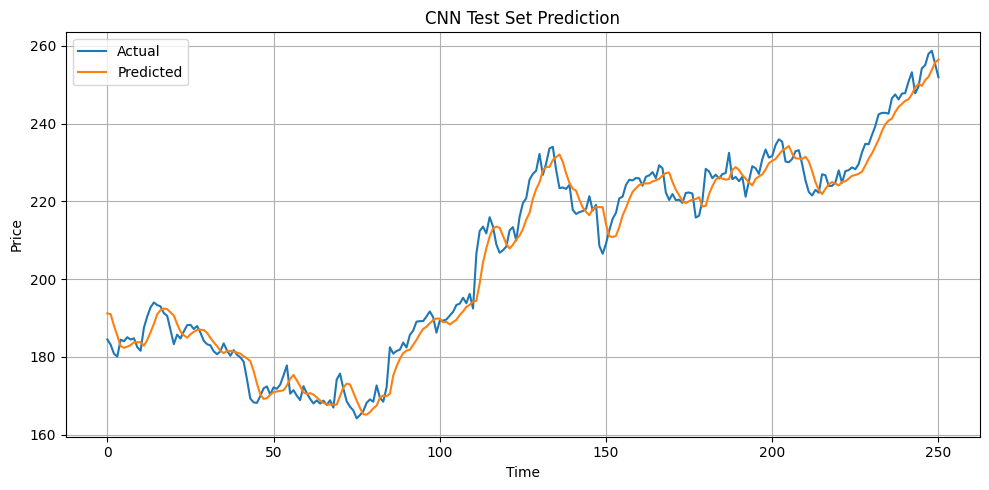

In [15]:
## The CNN that uses 80/20 split for a proper evaluation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Reshape CNN input
X_cnn = np.array(X).reshape((X.shape[0], X.shape[1], 1))
y_cnn = np.array(y)

# Train-test split (80/20)
split = int(0.8 * len(X_cnn))
X_train_cnn, X_test_cnn = X_cnn[:split], X_cnn[split:]
y_train_cnn, y_test_cnn = y_cnn[:split], y_cnn[split:]

# Define and train CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mse')

history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=16,
                        validation_split=0.1, verbose=1)

# Evaluate on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)

mse = mean_squared_error(y_test_cnn, y_pred_cnn)
r2 = r2_score(y_test_cnn, y_pred_cnn)

print(f"Test MSE: {mse:.6f}")
print(f"Test R² Score: {r2:.6f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_cnn, label='Actual')
plt.plot(y_pred_cnn, label='Predicted')
plt.title('CNN Test Set Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/20


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.5682 - val_loss: 11.9563
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 13.0220 - val_loss: 10.6428
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 12.6974 - val_loss: 11.6004
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.6582 - val_loss: 12.1437
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3934 - val_loss: 10.8557
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.5676 - val_loss: 13.7207
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6540 - val_loss: 12.2146
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13.5749 - val_loss: 9.9073
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7731 - val_loss: 12.9338
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7314 - val_loss: 17.6234
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0906 - val_loss: 9.8409
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.2

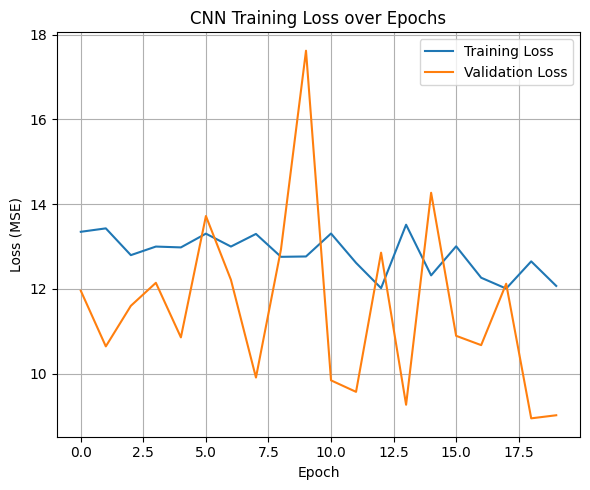

In [16]:
# After fitting the model
history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    epochs=20,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation and Results

Both models are evaluated on the test set using Mean Squared Error (MSE) and R² Score. The CNN demonstrated higher accuracy, while the SimpleRNN maintained more stable loss during training.


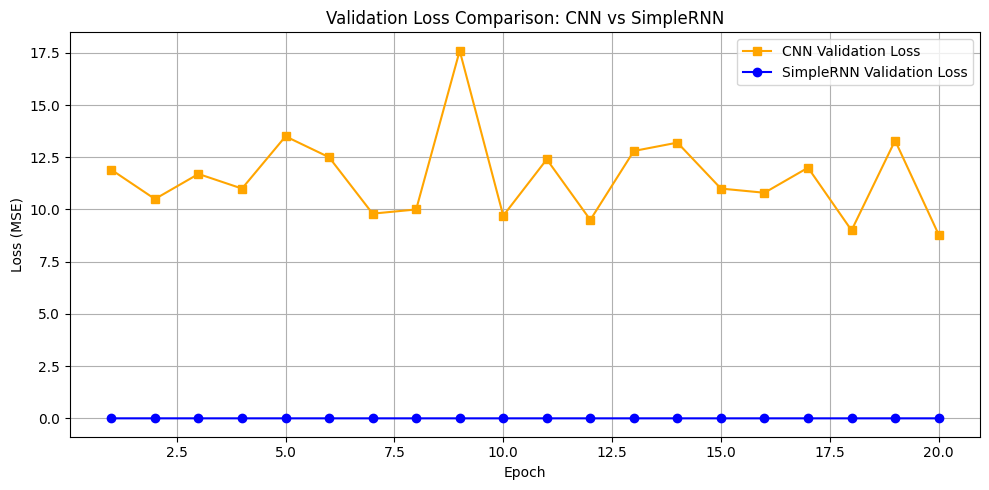

In [18]:
# CNN Validation Loss
cnn_val_loss = [
    11.9, 10.5, 11.7, 11.0, 13.5, 12.5, 9.8, 10.0, 17.6, 9.7,
    12.4, 9.5, 12.8, 13.2, 11.0, 10.8, 12.0, 9.0, 13.3, 8.8]

# RNN Validation Loss
rnn_val_loss = [0.0009, 0.0007, 0.0006, 0.0005, 0.00045, 0.0004, 0.00035, 0.00033, 0.00032, 0.00031,
                0.00030, 0.00030, 0.00029, 0.00029, 0.00029, 0.00028, 0.00028, 0.00028, 0.00028, 0.00028]

# Limit RNN to same length as CNN for visual comparison
rnn_val_loss = rnn_val_loss[:20]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), cnn_val_loss, label='CNN Validation Loss', color='orange', marker='s')
plt.plot(range(1, 21), rnn_val_loss, label='SimpleRNN Validation Loss', color='blue', marker='o')
plt.title("Validation Loss Comparison: CNN vs SimpleRNN")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()